`Decision Tree Algorithm
`
A decision tree is a supervised machine learning algorithm used for classification and regression tasks. It works by recursively partitioning the data into smaller subsets based on the features of the data.

How Decision Trees Work:

1. Root Node: The algorithm starts with a root node that represents the entire dataset.
2. Feature Selection: The algorithm selects the best feature to split the data based on a specific criterion (e.g., Gini impurity or entropy).
3. Splitting: The data is split into two or more child nodes based on the selected feature.
4. Recursion: The algorithm recursively applies the feature selection and splitting process to each child node until a stopping criterion is met (e.g., all instances in a node belong to the same class).
5. Leaf Node: The final nodes in the tree are called leaf nodes, which represent the predicted class labels or target values.

Types of Decision Trees:

1. Classification Trees: Used for classification tasks, where the target variable is categorical.
2. Regression Trees: Used for regression tasks, where the target variable is continuous.

Advantages:

1. Interpretability: Decision trees are easy to interpret and visualize.
2. Handling Non-Linear Relationships: Decision trees can handle non-linear relationships between features and target variables.
3. Handling Missing Values: Decision trees can handle missing values in the data.

Disadvantages:

1. Overfitting: Decision trees can suffer from overfitting, especially when the trees are deep.
2. Instability: Decision trees can be unstable, meaning small changes in the data can result in large changes in the tree structure.

Applications:

1. Classification: Decision trees are widely used for classification tasks, such as spam detection, sentiment analysis, and medical diagnosis.
2. Regression: Decision trees are used for regression tasks, such as predicting continuous outcomes like house prices or stock prices.

Ensemble Methods:

1. Random Forests: An ensemble method that combines multiple decision trees to improve the accuracy and robustness of predictions.
2. Gradient Boosting: An ensemble method that combines multiple decision trees in a sequential manner to improve the accuracy of predictions.

Decision trees are a fundamental algorithm in machine learning, and their simplicity and interpretability make them a popular choice for many applications.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


In [48]:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [50]:

# 1. Numeric imputation
num_imputer = SimpleImputer(strategy="median")
data[["age", "fare"]] = num_imputer.fit_transform(data[["age", "fare"]])

# 2. Categorical imputation
cat_imputer = SimpleImputer(strategy="most_frequent")
data[["embark_town", "embarked"]] = cat_imputer.fit_transform(data[["embark_town", "embarked"]])

# 3. Drop unnecessary column
data = data.drop(columns="deck", axis=1)

# 4. Label encode categorical/object columns
le = LabelEncoder()
for col in data.select_dtypes(include=["object", "category"]).columns:
    data[col] = le.fit_transform(data[col])

print(data.head())

   survived  pclass  sex   age  sibsp  parch     fare  embarked  class  who  \
0         0       3    1  22.0      1      0   7.2500         2      2    1   
1         1       1    0  38.0      1      0  71.2833         0      0    2   
2         1       3    0  26.0      0      0   7.9250         2      2    2   
3         1       1    0  35.0      1      0  53.1000         2      0    2   
4         0       3    1  35.0      0      0   8.0500         2      2    1   

   adult_male  embark_town  alive  alone  
0        True            2      0  False  
1       False            0      1  False  
2       False            2      1   True  
3       False            2      1  False  
4        True            2      0   True  


In [51]:
X = data.drop(columns=['alive', 'survived'], axis=1)
y = data['survived']

train_X, test_X, train_Y, test_Y = train_test_split(X, y, train_size=0.2, random_state=42)

In [ ]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(train_X, train_Y)

y_pred = model.predict(test_X)

In [53]:
# 📊 Evaluate performance
print("\nConfusion Matrix:\n", confusion_matrix(test_Y, y_pred))
print("\nClassification Report:\n", classification_report(test_Y, y_pred))


Confusion Matrix:
 [[366  70]
 [ 85 192]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83       436
           1       0.73      0.69      0.71       277

    accuracy                           0.78       713
   macro avg       0.77      0.77      0.77       713
weighted avg       0.78      0.78      0.78       713



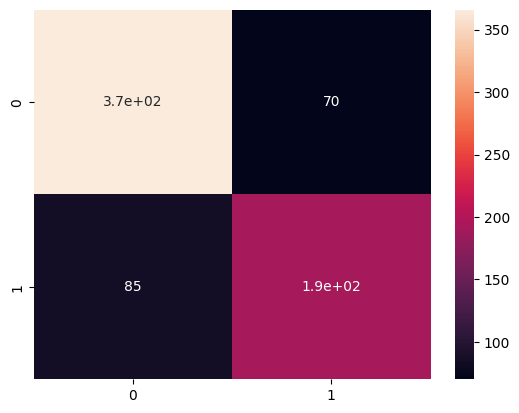

In [54]:
sns.heatmap(data=confusion_matrix(test_Y, y_pred), annot=True)
plt.show()